<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Neural-Networks" data-toc-modified-id="Neural-Networks-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Neural Networks</a></span></li><li><span><a href="#Training-a-multi-layer-neural-networks" data-toc-modified-id="Training-a-multi-layer-neural-networks-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Training a multi layer neural networks</a></span><ul class="toc-item"><li><span><a href="#Keras-overview" data-toc-modified-id="Keras-overview-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Keras overview</a></span></li><li><span><a href="#Step-1.-Define-Network" data-toc-modified-id="Step-1.-Define-Network-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Step 1. Define Network</a></span></li><li><span><a href="#Step-2.-Compile-Network" data-toc-modified-id="Step-2.-Compile-Network-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Step 2. Compile Network</a></span></li><li><span><a href="#Step-3.-Fit-Network" data-toc-modified-id="Step-3.-Fit-Network-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Step 3. Fit Network</a></span></li><li><span><a href="#Step-4.-Evaluate-Network" data-toc-modified-id="Step-4.-Evaluate-Network-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Step 4. Evaluate Network</a></span></li><li><span><a href="#Step-5.-Make-Predictions" data-toc-modified-id="Step-5.-Make-Predictions-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Step 5. Make Predictions</a></span></li></ul></li><li><span><a href="#Try-yourself" data-toc-modified-id="Try-yourself-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Try yourself</a></span></li><li><span><a href="#Improve-your-network" data-toc-modified-id="Improve-your-network-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Improve your network</a></span></li><li><span><a href="#Export-your-model" data-toc-modified-id="Export-your-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Export your model</a></span></li></ul></div>

# Neural Networks

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = pd.read_csv('data/diabetes.csv')
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [3]:
# there are zero values in Glucose, BloodPressure, SkinThickness, Insulin, BMI
# need to replace zero by median, 2 steps: replace 0 by NaN, then replace NaN by median (so that 0 will not affect median)
# after this step, run previous visualisation again

diabetes.Glucose.replace(0, np.nan, inplace=True)
diabetes.Glucose.replace(np.nan, diabetes['Glucose'].median(), inplace=True)
diabetes.BloodPressure.replace(0, np.nan, inplace=True)
diabetes.BloodPressure.replace(np.nan, diabetes['BloodPressure'].median(), inplace=True)
diabetes.SkinThickness.replace([0, 99.0], np.nan, inplace=True)
diabetes.SkinThickness.replace(np.nan, diabetes['SkinThickness'].median(), inplace=True)
diabetes.Insulin.replace(0, np.nan, inplace=True)
diabetes.Insulin.replace(np.nan, diabetes['Insulin'].median(), inplace=True)
diabetes.BMI.replace(0, np.nan, inplace=True)
diabetes.BMI.replace(np.nan, diabetes['BMI'].median(), inplace=True)

In [4]:
X, y = diabetes.drop('Outcome', axis=1), diabetes['Outcome']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Training a multi layer neural networks

In [12]:
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network._multilayer_perceptron:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity', 

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(max_iter=10000, solver='adam')
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.997
Accuracy on test set: 0.729


## Keras overview
Below is an overview of the 5 steps in the neural network model life-cycle in Keras that we are going to look at.

1. Define Network.
2. Compile Network.
3. Fit Network.
4. Evaluate Network.
5. Make Predictions.

![5-step](img/5-Step-Life-Cycle-for-Neural-Network-Models-in-Keras.png)

## Step 1. Define Network
The first step is to define your neural network.

Neural networks are defined in Keras as a sequence of layers. The container for these layers is the Sequential class.

The first step is to create an instance of the Sequential class. Then you can create your layers and add them in the order that they should be connected.

For example, we can do this in two steps:

In [2]:
model = Sequential()
model.add(Dense(2))

But we can also do this in one step by creating an array of layers and passing it to the constructor of the Sequential.

In [3]:
layers = [Dense(2)]
model = Sequential(layers)

The first layer in the network must define the number of inputs to expect. The way that this is specified can differ depending on the network type, but for a Multilayer Perceptron model this is specified by the input_dim attribute.

For example, a small Multilayer Perceptron model with 2 inputs in the visible layer, 5 neurons in the hidden layer and one neuron in the output layer can be defined as:

In [4]:
model = Sequential()
model.add(Dense(5, input_dim=2))
model.add(Dense(1))

Think of a Sequential model as a pipeline with your raw data fed in at the bottom and predictions that come out at the top.

This is a helpful conception in Keras as concerns that were traditionally associated with a layer can also be split out and added as separate layers, clearly showing their role in the transform of data from input to prediction. For example, activation functions that transform a summed signal from each neuron in a layer can be extracted and added to the Sequential as a layer-like object called Activation.

In [5]:
model = Sequential()
model.add(Dense(5, input_dim=2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

The choice of activation function is most important for the output layer as it will define the format that predictions will take.

For example, below are some common predictive modeling problem types and the structure and standard activation function that you can use in the output layer:

* Regression: Linear activation function or ‘linear’ and the number of neurons matching the number of outputs.
* Binary Classification (2 class): Logistic activation function or ‘sigmoid’ and one neuron the output layer.
* Multiclass Classification (>2 class): Softmax activation function or ‘softmax’ and one output neuron per class value, assuming a one-hot encoded output pattern.

## Step 2. Compile Network
Once we have defined our network, we must compile it.

Compilation is an efficiency step. It transforms the simple sequence of layers that we defined into a highly efficient series of matrix transforms in a format intended to be executed on your GPU or CPU, depending on how Keras is configured.

Think of compilation as a precompute step for your network.

Compilation is always required after defining a model. This includes both before training it using an optimization scheme as well as loading a set of pre-trained weights from a save file. The reason is that the compilation step prepares an efficient representation of the network that is also required to make predictions on your hardware.

Compilation requires a number of parameters to be specified, specifically tailored to training your network. Specifically the optimization algorithm to use to train the network and the loss function used to evaluate the network that is minimized by the optimization algorithm.

For example, below is a case of compiling a defined model and specifying the stochastic gradient descent (sgd) optimization algorithm and the mean squared error (mse) loss function, intended for a regression type problem.

In [6]:
model.compile(optimizer='sgd', loss='mse')

The type of predictive modeling problem imposes constraints on the type of loss function that can be used.

For example, below are some standard loss functions for different predictive model types:

* Regression: Mean Squared Error or ‘mse‘.
* Binary Classification (2 class): Logarithmic Loss, also called cross entropy or ‘binary_crossentropy‘.
* Multiclass Classification (>2 class): Multiclass Logarithmic Loss or ‘categorical_crossentropy‘.

You can review the [suite of loss functions supported by Keras](https://keras.io/objectives/).

The most common optimization algorithm is stochastic gradient descent, but Keras also supports a [suite of other state of the art optimization algorithms](https://keras.io/optimizers/).

Perhaps the most commonly used optimization algorithms because of their generally better performance are:

* Stochastic Gradient Descent or ‘sgd‘ that requires the tuning of a learning rate and momentum.
* ADAM or ‘adam‘ that requires the tuning of learning rate.
* RMSprop or ‘rmsprop‘ that requires the tuning of learning rate.

Finally, you can also specify metrics to collect while fitting your model in addition to the loss function. Generally, the most useful additional metric to collect is accuracy for classification problems. The metrics to collect are specified by name in an array.

For example:

In [7]:
model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

## Step 3. Fit Network
Once the network is compiled, it can be fit, which means adapt the weights on a training dataset.

Fitting the network requires the training data to be specified, both a matrix of input patterns X and an array of matching output patterns y.

The network is trained using the backpropagation algorithm and optimized according to the optimization algorithm and loss function specified when compiling the model.

The backpropagation algorithm requires that the network be trained for a specified number of epochs or exposures to the training dataset.

Each epoch can be partitioned into groups of input-output pattern pairs called batches. This define the number of patterns that the network is exposed to before the weights are updated within an epoch. It is also an efficiency optimization, ensuring that not too many input patterns are loaded into memory at a time.

A minimal example of fitting a network is as follows:

In [ ]:
history = model.fit(X, y, batch_size=10, epochs=100)

Once fit, a history object is returned that provides a summary of the performance of the model during training. This includes both the loss and any additional metrics specified when compiling the model, recorded each epoch.

## Step 4. Evaluate Network
Once the network is trained, it can be evaluated.

The network can be evaluated on the training data, but this will not provide a useful indication of the performance of the network as a predictive model, as it has seen all of this data before.

We can evaluate the performance of the network on a separate dataset, unseen during testing. This will provide an estimate of the performance of the network at making predictions for unseen data in the future.

The model evaluates the loss across all of the test patterns, as well as any other metrics specified when the model was compiled, like classification accuracy. A list of evaluation metrics is returned.

For example, for a model compiled with the accuracy metric, we could evaluate it on a new dataset as follows:

In [ ]:
loss, accuracy = model.evaluate(X, y)

## Step 5. Make Predictions
Finally, once we are satisfied with the performance of our fit model, we can use it to make predictions on new data.

This is as easy as calling the predict() function on the model with an array of new input patterns.

For example:

In [ ]:
predictions = model.predict(x)

The predictions will be returned in the format provided by the output layer of the network.

In the case of a regression problem, these predictions may be in the format of the problem directly, provided by a linear activation function.

For a binary classification problem, the predictions may be an array of probabilities for the first class that can be converted to a 1 or 0 by rounding.

For a multiclass classification problem, the results may be in the form of an array of probabilities (assuming a one hot encoded output variable) that may need to be converted to a single class output prediction using the [argmax function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html).


# Try yourself

In [20]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [17]:
import keras

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [21]:
# 1. define the network
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

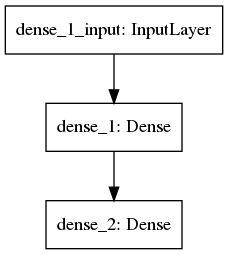

In [22]:
from keras.utils import plot_model
plot_model(model)

In [23]:
# 2. compile the network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [24]:
# 3. fit the network
history = model.fit(X_train, y_train, epochs=1000, batch_size=10)

Epoch 1/1000
576/576 [==============================] - 0s 384us/step - loss: 7.2864 - accuracy: 0.5312
Epoch 2/1000
576/576 [==============================] - 0s 168us/step - loss: 4.2037 - accuracy: 0.4688
Epoch 3/1000
576/576 [==============================] - 0s 140us/step - loss: 2.8065 - accuracy: 0.4566
Epoch 4/1000
576/576 [==============================] - 0s 154us/step - loss: 1.8478 - accuracy: 0.5087
Epoch 5/1000
576/576 [==============================] - 0s 147us/step - loss: 1.2833 - accuracy: 0.5260
Epoch 6/1000
576/576 [==============================] - 0s 148us/step - loss: 1.1261 - accuracy: 0.5694
Epoch 7/1000
576/576 [==============================] - 0s 145us/step - loss: 1.0028 - accuracy: 0.5903
Epoch 8/1000
576/576 [==============================] - 0s 135us/step - loss: 0.9531 - accuracy: 0.6111
Epoch 9/1000
576/576 [==============================] - 0s 155us/step - loss: 0.8947 - accuracy: 0.6094
Epoch 10/1000
576/576 [==============================] - 0s 160u

576/576 [==============================] - 0s 130us/step - loss: 0.5584 - accuracy: 0.7361
Epoch 80/1000
576/576 [==============================] - 0s 135us/step - loss: 0.5411 - accuracy: 0.7309
Epoch 81/1000
576/576 [==============================] - 0s 127us/step - loss: 0.5858 - accuracy: 0.7153
Epoch 82/1000
576/576 [==============================] - 0s 132us/step - loss: 0.5634 - accuracy: 0.7326
Epoch 83/1000
576/576 [==============================] - 0s 140us/step - loss: 0.5575 - accuracy: 0.7153
Epoch 84/1000
576/576 [==============================] - 0s 127us/step - loss: 0.5732 - accuracy: 0.7188
Epoch 85/1000
576/576 [==============================] - 0s 128us/step - loss: 0.5577 - accuracy: 0.7309
Epoch 86/1000
576/576 [==============================] - 0s 123us/step - loss: 0.5439 - accuracy: 0.7188
Epoch 87/1000
576/576 [==============================] - 0s 133us/step - loss: 0.5515 - accuracy: 0.7378
Epoch 88/1000
576/576 [==============================] - 0s 138us/ste

Epoch 156/1000
576/576 [==============================] - 0s 124us/step - loss: 0.5201 - accuracy: 0.7535
Epoch 157/1000
576/576 [==============================] - 0s 129us/step - loss: 0.5298 - accuracy: 0.7413
Epoch 158/1000
576/576 [==============================] - 0s 133us/step - loss: 0.5049 - accuracy: 0.7639
Epoch 159/1000
576/576 [==============================] - 0s 137us/step - loss: 0.4949 - accuracy: 0.7743
Epoch 160/1000
576/576 [==============================] - 0s 133us/step - loss: 0.5089 - accuracy: 0.7726
Epoch 161/1000
576/576 [==============================] - 0s 125us/step - loss: 0.5177 - accuracy: 0.7552
Epoch 162/1000
576/576 [==============================] - 0s 119us/step - loss: 0.4911 - accuracy: 0.7830
Epoch 163/1000
576/576 [==============================] - 0s 142us/step - loss: 0.5007 - accuracy: 0.7604
Epoch 164/1000
576/576 [==============================] - 0s 118us/step - loss: 0.4966 - accuracy: 0.7569
Epoch 165/1000
576/576 [======================

576/576 [==============================] - 0s 140us/step - loss: 0.4700 - accuracy: 0.7951
Epoch 311/1000
576/576 [==============================] - 0s 145us/step - loss: 0.4696 - accuracy: 0.7778
Epoch 312/1000
576/576 [==============================] - 0s 148us/step - loss: 0.4674 - accuracy: 0.7830
Epoch 313/1000
576/576 [==============================] - 0s 140us/step - loss: 0.4776 - accuracy: 0.7691
Epoch 314/1000
576/576 [==============================] - 0s 145us/step - loss: 0.4803 - accuracy: 0.7917
Epoch 315/1000
576/576 [==============================] - 0s 144us/step - loss: 0.4816 - accuracy: 0.7726
Epoch 316/1000
576/576 [==============================] - 0s 139us/step - loss: 0.4650 - accuracy: 0.7726
Epoch 317/1000
576/576 [==============================] - 0s 129us/step - loss: 0.4573 - accuracy: 0.7951
Epoch 318/1000
576/576 [==============================] - 0s 135us/step - loss: 0.4721 - accuracy: 0.7865
Epoch 319/1000
576/576 [==============================] - 0s 

576/576 [==============================] - 0s 139us/step - loss: 0.4550 - accuracy: 0.7847
Epoch 465/1000
576/576 [==============================] - 0s 132us/step - loss: 0.4535 - accuracy: 0.7986
Epoch 466/1000
576/576 [==============================] - 0s 139us/step - loss: 0.4441 - accuracy: 0.8038
Epoch 467/1000
576/576 [==============================] - 0s 135us/step - loss: 0.4524 - accuracy: 0.7899
Epoch 468/1000
576/576 [==============================] - 0s 147us/step - loss: 0.4434 - accuracy: 0.7899
Epoch 469/1000
576/576 [==============================] - 0s 134us/step - loss: 0.4420 - accuracy: 0.8073
Epoch 470/1000
576/576 [==============================] - 0s 157us/step - loss: 0.4529 - accuracy: 0.7986
Epoch 471/1000
576/576 [==============================] - 0s 150us/step - loss: 0.4751 - accuracy: 0.7674
Epoch 472/1000
576/576 [==============================] - 0s 145us/step - loss: 0.4743 - accuracy: 0.7812
Epoch 473/1000
576/576 [==============================] - 0s 

576/576 [==============================] - 0s 155us/step - loss: 0.4318 - accuracy: 0.7986
Epoch 619/1000
576/576 [==============================] - 0s 138us/step - loss: 0.4654 - accuracy: 0.7795
Epoch 620/1000
576/576 [==============================] - 0s 136us/step - loss: 0.4383 - accuracy: 0.8056
Epoch 621/1000
576/576 [==============================] - 0s 157us/step - loss: 0.4450 - accuracy: 0.8125
Epoch 622/1000
576/576 [==============================] - 0s 140us/step - loss: 0.4476 - accuracy: 0.7986
Epoch 623/1000
576/576 [==============================] - 0s 143us/step - loss: 0.4441 - accuracy: 0.7917
Epoch 624/1000
576/576 [==============================] - 0s 128us/step - loss: 0.4421 - accuracy: 0.7986
Epoch 625/1000
576/576 [==============================] - 0s 149us/step - loss: 0.4617 - accuracy: 0.7812
Epoch 626/1000
576/576 [==============================] - 0s 152us/step - loss: 0.4340 - accuracy: 0.8108
Epoch 627/1000
576/576 [==============================] - 0s 

576/576 [==============================] - 0s 173us/step - loss: 0.4493 - accuracy: 0.7847
Epoch 773/1000
576/576 [==============================] - 0s 153us/step - loss: 0.4357 - accuracy: 0.8142
Epoch 774/1000
576/576 [==============================] - 0s 161us/step - loss: 0.4468 - accuracy: 0.7830
Epoch 775/1000
576/576 [==============================] - 0s 176us/step - loss: 0.4449 - accuracy: 0.7899
Epoch 776/1000
576/576 [==============================] - 0s 159us/step - loss: 0.4222 - accuracy: 0.8125
Epoch 777/1000
576/576 [==============================] - 0s 160us/step - loss: 0.4283 - accuracy: 0.7969
Epoch 778/1000
576/576 [==============================] - 0s 151us/step - loss: 0.4360 - accuracy: 0.7882
Epoch 779/1000
576/576 [==============================] - 0s 144us/step - loss: 0.4311 - accuracy: 0.8003
Epoch 780/1000
576/576 [==============================] - 0s 138us/step - loss: 0.4327 - accuracy: 0.7969
Epoch 781/1000
576/576 [==============================] - 0s 

576/576 [==============================] - 0s 122us/step - loss: 0.4315 - accuracy: 0.8038
Epoch 927/1000
576/576 [==============================] - 0s 127us/step - loss: 0.4219 - accuracy: 0.8142
Epoch 928/1000
576/576 [==============================] - 0s 127us/step - loss: 0.4169 - accuracy: 0.8090
Epoch 929/1000
576/576 [==============================] - 0s 145us/step - loss: 0.4272 - accuracy: 0.8247
Epoch 930/1000
576/576 [==============================] - 0s 136us/step - loss: 0.4275 - accuracy: 0.7986
Epoch 931/1000
576/576 [==============================] - 0s 134us/step - loss: 0.4254 - accuracy: 0.8229
Epoch 932/1000
576/576 [==============================] - 0s 123us/step - loss: 0.4306 - accuracy: 0.8108
Epoch 933/1000
576/576 [==============================] - 0s 140us/step - loss: 0.4158 - accuracy: 0.8073
Epoch 934/1000
576/576 [==============================] - 0s 142us/step - loss: 0.4786 - accuracy: 0.7691
Epoch 935/1000
576/576 [==============================] - 0s 

In [25]:
# 4. evaluate the network
loss, accuracy = model.evaluate(X_train, y_train)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

576/576 [==============================] - 0s 56us/step

Loss: 0.43, Accuracy: 80.90%


In [26]:
# 5. make predictions
probabilities = model.predict(X_test)
predictions = [float(round(x[0])) for x in probabilities]
accuracy = np.mean(predictions == y_test)
print("Prediction Accuracy: %.2f%%" % (accuracy*100))

Prediction Accuracy: 74.48%


# Improve your network

In [27]:
model_two_layers = Sequential()
model_two_layers.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model_two_layers.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model_two_layers.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model_two_layers.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model_two_layers.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0)


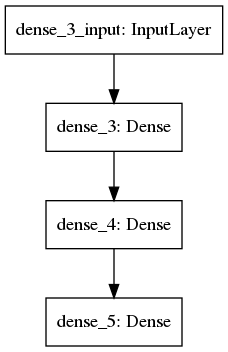

In [28]:
plot_model(model_two_layers)

In [38]:
model_two_layers.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [29]:
# 4. evaluate the network
loss, accuracy = model.evaluate(X_train, y_train)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

576/576 [==============================] - 0s 19us/step

Loss: 0.43, Accuracy: 80.90%


In [30]:
# 4. evaluate the network
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy*100))

192/192 [==============================] - 0s 24us/step
Accuracy: 74.48%


# Export your model

In [35]:
from keras.models import load_model, model_from_yaml, model_from_json

In [ ]:
# save model and architecture to single file
model.save("model.h5")

# load model
model = load_model('model.h5')

# summarize model.
model.summary()

In [33]:
print(model.to_yaml())

backend: tensorflow
class_name: Sequential
config:
  layers:
  - class_name: Dense
    config:
      activation: relu
      activity_regularizer: null
      batch_input_shape: !!python/tuple
      - null
      - 8
      bias_constraint: null
      bias_initializer:
        class_name: Zeros
        config: {}
      bias_regularizer: null
      dtype: float32
      kernel_constraint: null
      kernel_initializer:
        class_name: VarianceScaling
        config:
          distribution: uniform
          mode: fan_avg
          scale: 1.0
          seed: null
      kernel_regularizer: null
      name: dense_1
      trainable: true
      units: 12
      use_bias: true
  - class_name: Dense
    config:
      activation: sigmoid
      activity_regularizer: null
      bias_constraint: null
      bias_initializer:
        class_name: Zeros
        config: {}
      bias_regularizer: null
      dtype: float32
      kernel_constraint: null
      kernel_initializer:
        class_name: Varianc

In [36]:
# serialize model to YAML
model_yaml = model.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()

loaded_model = model_from_yaml(loaded_model_yaml)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk
